# Analysis

Analysis of the salaries scraped from NoFluffJobs.

2024.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style("whitegrid")

In [28]:
DATA_PATHS: list = [
    "../data/transformed/data_nofluffjobs_data_engineer.json",
    "../data/transformed/data_nofluffjobs_machine_learning_engineer.json",
]

data = []
for path in DATA_PATHS:
    with open(path, "r") as f:
        data += json.load(f)["data"]

df = pd.DataFrame(data)

# Remove duplicates - based on title, company and seniority
df = df.drop_duplicates(subset=["title", "company", "seniority"])

# Add median salary column
df['median_salary'] = df[['min_salary', 'max_salary']].mean(axis=1)

df.head()

,url,title,company,seniority,categories:,skills,min_salary,max_salary
0,https://nofluffjobs.com/job/senior-data-engine...,Senior Data Engineer - Machine Learning Research,Allegro,Senior,[Data],"[Degree, Python, Git, DevOps, SQL, GCP, Airflo...",16100,23200
1,https://nofluffjobs.com/job/senior-data-engine...,Senior Data Engineer - FP&A,Allegro,Senior,[Data],"[SQL, Python, GCP, Airflow, Google Composer, D...",16100,23200
2,https://nofluffjobs.com/job/senior-data-engine...,Senior Data Engineer (AWS),GetInData | Part of Xebia,Senior,"[Data, AWS]","[Python, SQL, Redshift, AWS, Airflow, Docker, ...",26880,33600
3,https://nofluffjobs.com/job/senior-data-engine...,Senior Data Engineer (GCP),GetInData | Part of Xebia,Senior,"[Data, GCP]","[Python, SQL, BigQuery, Spark, GCP, Airflow, K...",26880,33600
4,https://nofluffjobs.com/job/senior-data-engine...,Senior Data Engineer (Azure),GetInData | Part of Xebia,Senior,[Data],"[Python, SQL, Databricks, Kafka, Git, Airflow,...",26880,33600


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 0 to 78
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            75 non-null     object 
 1   title          75 non-null     object 
 2   company        75 non-null     object 
 3   seniority      75 non-null     object 
 4   categories:    75 non-null     object 
 5   skills         75 non-null     object 
 6   min_salary     75 non-null     int64  
 7   max_salary     75 non-null     int64  
 8   median_salary  75 non-null     float64
dtypes: float64(1), int64(2), object(6)
memory usage: 5.9+ KB


In [ ]:
# Creating a boxplot of average salaries across different seniority levels
plt.figure(figsize=(8, 6))
sns.boxplot(y='median_salary', data=df, palette='Set2')
plt.xlabel('Seniority Level')
plt.ylabel('Average Salary')
plt.title('Average Salaries Across Seniority Levels')
plt.tight_layout()

# Save the plot to /plots/
Path("plots").mkdir(exist_ok=True)
plt.savefig("plots/salaries_seniority.png")

# Show the plot
plt.show()

# UOP

In [102]:
DATA_PATHS: list = [
    "../data/transformed/data_nofluffjobs_data_engineer_employment.json",
    "../data/transformed/data_nofluffjobs_machine_learning_engineer_employment.json",
]

data = []
for path in DATA_PATHS:
    with open(path, "r") as f:
        data += json.load(f)["data"]

df = pd.DataFrame(data)

# Remove duplicates - based on title, company and seniority
df = df.drop_duplicates(subset=["title", "company", "seniority"])

# Add median salary column
df['median_salary'] = df[['min_salary', 'max_salary']].mean(axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 0 to 36
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            34 non-null     object 
 1   title          34 non-null     object 
 2   company        34 non-null     object 
 3   seniority      34 non-null     object 
 4   categories:    34 non-null     object 
 5   skills         34 non-null     object 
 6   min_salary     34 non-null     int64  
 7   max_salary     34 non-null     int64  
 8   median_salary  34 non-null     float64
dtypes: float64(1), int64(2), object(6)
memory usage: 2.7+ KB


## Mid

In [103]:
# Filter for mid only
df_filtered = df[df["seniority"] == "Mid"].reset_index(drop=True)

df_filtered.head()

,url,title,company,seniority,categories:,skills,min_salary,max_salary,median_salary
0,https://nofluffjobs.com/job/data-engineer-prod...,Data Engineer - Product Catalogue ML,Allegro,Mid,[Data],"[Python, Big Data, Spark, DevOps, SQL, ML, AI,...",12300,17600,14950.0
1,https://nofluffjobs.com/job/data-engineer-deli...,Data Engineer (Delivery Experience),Allegro,Mid,[Data],"[GCP, SQL, ETL, ELT, Python, PySpark, Airflow,...",12300,17600,14950.0
2,https://nofluffjobs.com/job/remote-mid-data-en...,Remote Mid Data Engineer,Kingfisher plc.,Mid,"[Data, Python]","[Python, AWS, Data modelling, Storage, Azure C...",15000,19000,17000.0
3,https://nofluffjobs.com/job/data-engineer-chor...,Data Engineer,Chorus One,Mid,"[Data, AWS]","[Blockchain, SQL, AWS, GCP, Azure, NoSQL, Airf...",23389,33413,28401.0
4,https://nofluffjobs.com/job/big-data-engineer-...,Big Data Engineer,Reply Polska,Mid,"[Data, Spark]","[Spark, Kubernetes, Docker, Microservices, Ter...",9000,16000,12500.0


/var/folders/5j/c9443ny96w1dn8fvj92_g8700000gn/T/ipykernel_16296/3761845190.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='median_salary', data=df_filtered, palette='Set2')


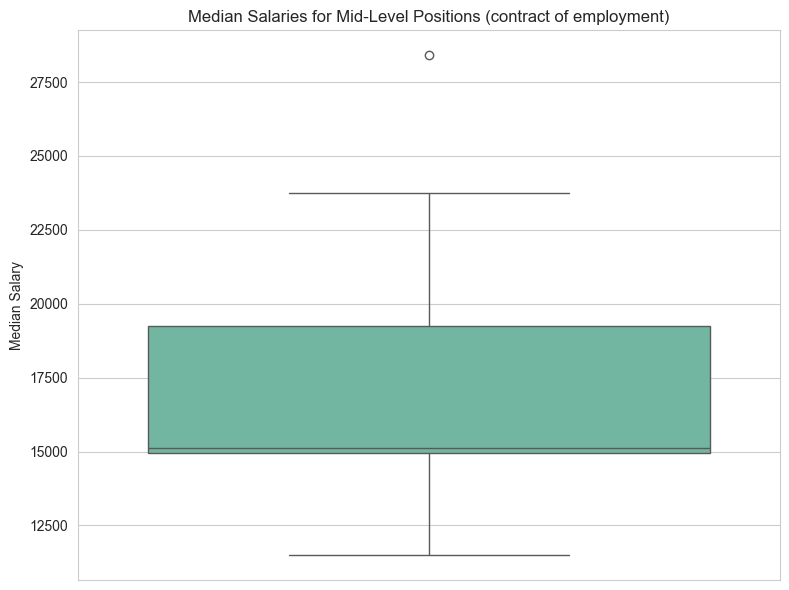

In [104]:
# Creating a boxplot of average salaries across different seniority levels
plt.figure(figsize=(8, 6))
sns.boxplot(y='median_salary', data=df_filtered, palette='Set2')
plt.ylabel('Median Salary')
plt.title('Median Salaries for Mid-Level Positions (contract of employment)')
plt.tight_layout()

# Save the plot to /plots/
Path("plots").mkdir(exist_ok=True)

plt.tight_layout()
plt.savefig("plots/boxplot_mid_uop.png")

# Show the plot
plt.show()

In [105]:
df_stats = df_filtered.describe()
df_stats

,min_salary,max_salary,median_salary
count,14.000000,14.000000,14.000000
mean,13744.857143,20241.714286,16993.285714
std,3880.074065,5660.789894,4670.391145
min,8000.000000,15000.000000,11500.000000
25%,12300.000000,17000.000000,14950.000000
50%,13000.000000,17685.500000,15125.000000
75%,15750.000000,22750.000000,19250.000000
max,23389.000000,33413.000000,28401.000000


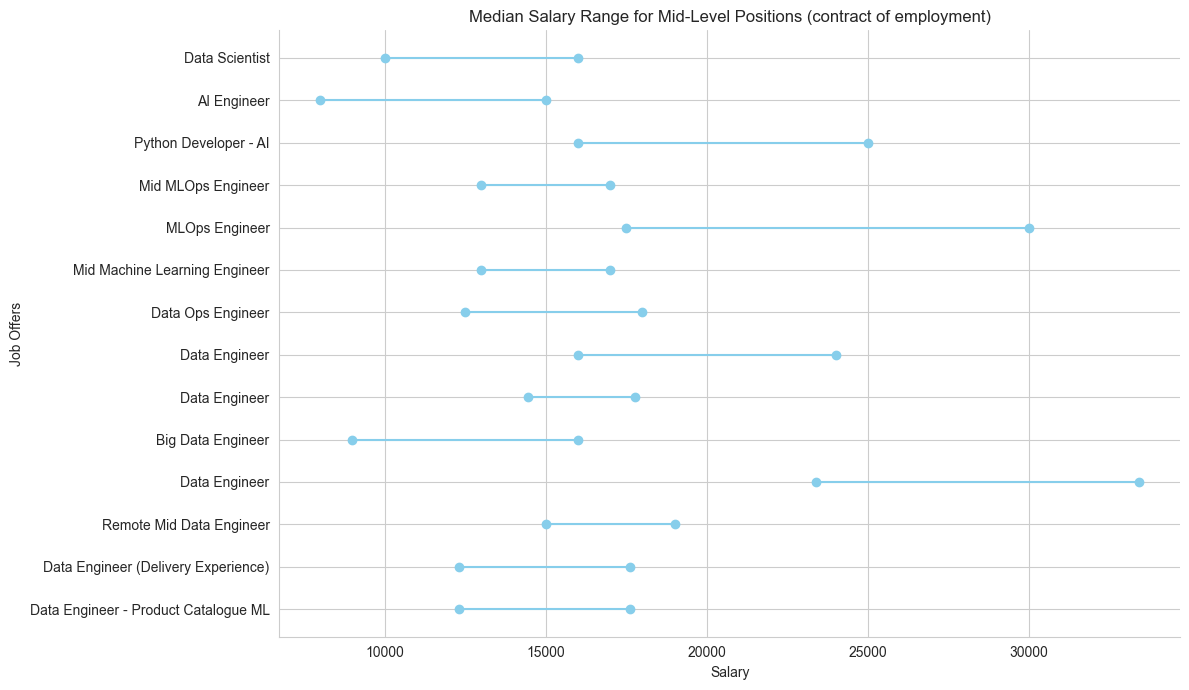

In [106]:
# Using Matplotlib for custom range plotting
plt.figure(figsize=(12, 7))

for i, row in df_filtered.iterrows():
    plt.plot([row['min_salary'], row['max_salary']], [i, i], marker='o', color='skyblue')

plt.yticks(range(len(df_filtered)), df_filtered['title'])
plt.xlabel('Salary')
plt.ylabel('Job Offers')

sns.despine()
plt.title('Median Salary Range for Mid-Level Positions (contract of employment)')

plt.tight_layout()
plt.savefig("plots/ranges_mid_uop.png")

plt.show()


/var/folders/5j/c9443ny96w1dn8fvj92_g8700000gn/T/ipykernel_16296/154449945.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='median_salary', y=df_sorted.index, data=df_sorted, orient='h', palette='coolwarm')
/var/folders/5j/c9443ny96w1dn8fvj92_g8700000gn/T/ipykernel_16296/154449945.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(df_sorted['title'])


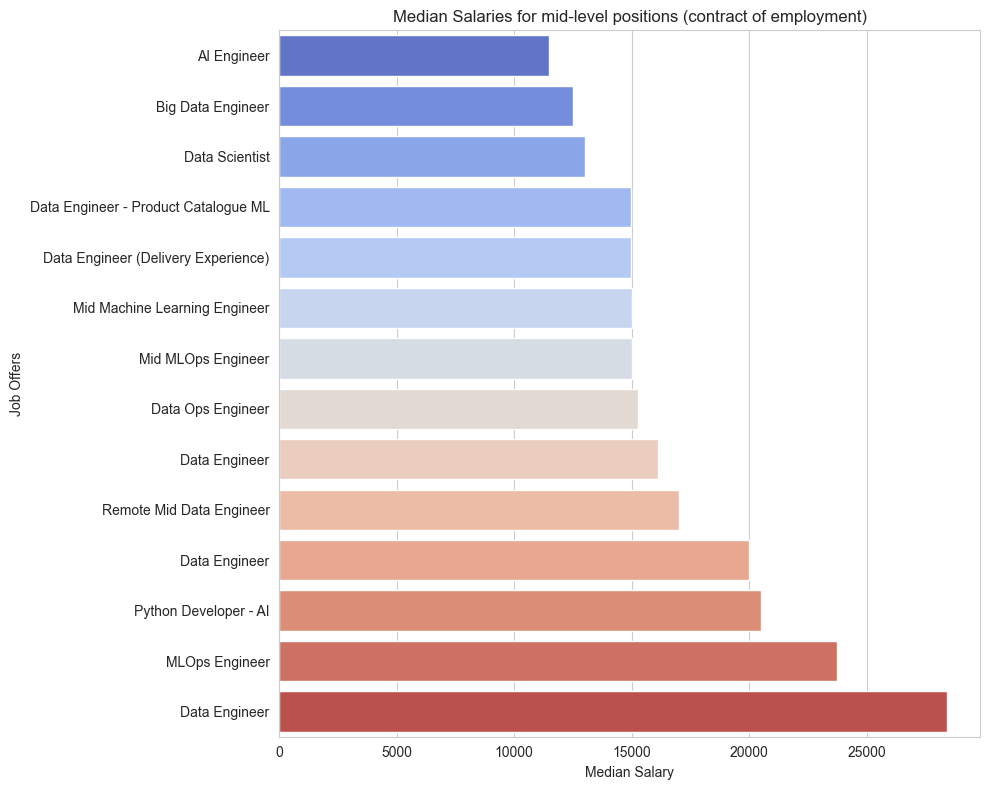

In [107]:
df_sorted = df_filtered.sort_values(by='median_salary', ascending=True).reset_index(drop=True)

plt.figure(figsize=(10, 8))

ax = sns.barplot(x='median_salary', y=df_sorted.index, data=df_sorted, orient='h', palette='coolwarm')

ax.set_yticklabels(df_sorted['title'])
ax.set_ylabel('Job Offers')
ax.set_xlabel('Median Salary')

plt.title('Median Salaries for mid-level positions (contract of employment)')

plt.tight_layout()
plt.savefig("plots/mediansalaries_mid_uop.png")

plt.show()

## Senior

In [108]:
# Filter for senior only
df_filtered = df[df["seniority"] == "Senior"].reset_index(drop=True)

df_filtered.head()

,url,title,company,seniority,categories:,skills,min_salary,max_salary,median_salary
0,https://nofluffjobs.com/job/senior-data-engine...,Senior Data Engineer - Machine Learning Research,Allegro,Senior,[Data],"[Degree, Python, Git, DevOps, SQL, GCP, Airflo...",16100,23200,19650.0
1,https://nofluffjobs.com/job/senior-data-engine...,Senior Data Engineer - FP&A,Allegro,Senior,[Data],"[SQL, Python, GCP, Airflow, Google Composer, D...",16100,23200,19650.0
2,https://nofluffjobs.com/job/senior-data-engine...,Senior Data Engineer,Falck IT Poland Sp. z o.o.,Senior,[Data],"[Kafka, SQL, Azure, Python, PySpark, Data mode...",24000,28000,26000.0
3,https://nofluffjobs.com/job/data-engineer-soll...,Data Engineer,Sollers Consulting,Senior,"[Data, Kafka]","[Spark, Kafka, SQL, NoSQL, ETL, Python, Java, ...",15000,19600,17300.0
4,https://nofluffjobs.com/job/senior-data-engine...,Senior Data Engineer,Link Group,Senior,"[Data, SQL]","[SQL, Python, Airflow, Data engineering, ETL, ...",24000,28000,26000.0


/var/folders/5j/c9443ny96w1dn8fvj92_g8700000gn/T/ipykernel_16296/3946814156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='median_salary', data=df_filtered, palette='Set2')


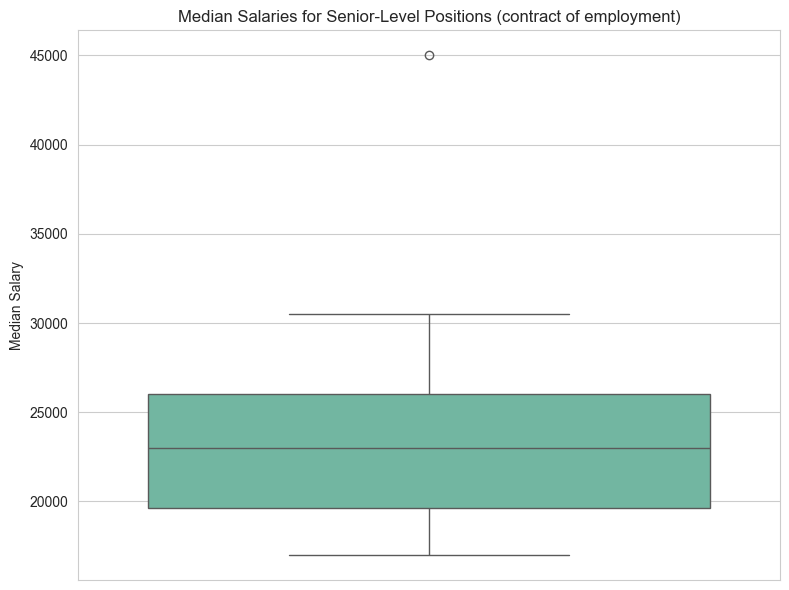

In [109]:
# Creating a boxplot of average salaries across different seniority levels
plt.figure(figsize=(8, 6))
sns.boxplot(y='median_salary', data=df_filtered, palette='Set2')
plt.ylabel('Median Salary')
plt.title('Median Salaries for Senior-Level Positions (contract of employment)')
plt.tight_layout()

# Save the plot to /plots/
Path("plots").mkdir(exist_ok=True)

plt.tight_layout()
plt.savefig("plots/boxplot_senior_uop.png")

# Show the plot
plt.show()

In [110]:
df_stats = df_filtered.describe()
df_stats

,min_salary,max_salary,median_salary
count,20.000000,20.000000,20.000000
mean,19631.100000,28046.450000,23838.775000
std,4967.386795,8486.389043,6214.171881
min,13500.000000,19600.000000,17000.000000
25%,15825.000000,23200.000000,19650.000000
50%,18250.000000,28000.000000,23000.000000
75%,24000.000000,28016.750000,26000.000000
max,30000.000000,60000.000000,45000.000000


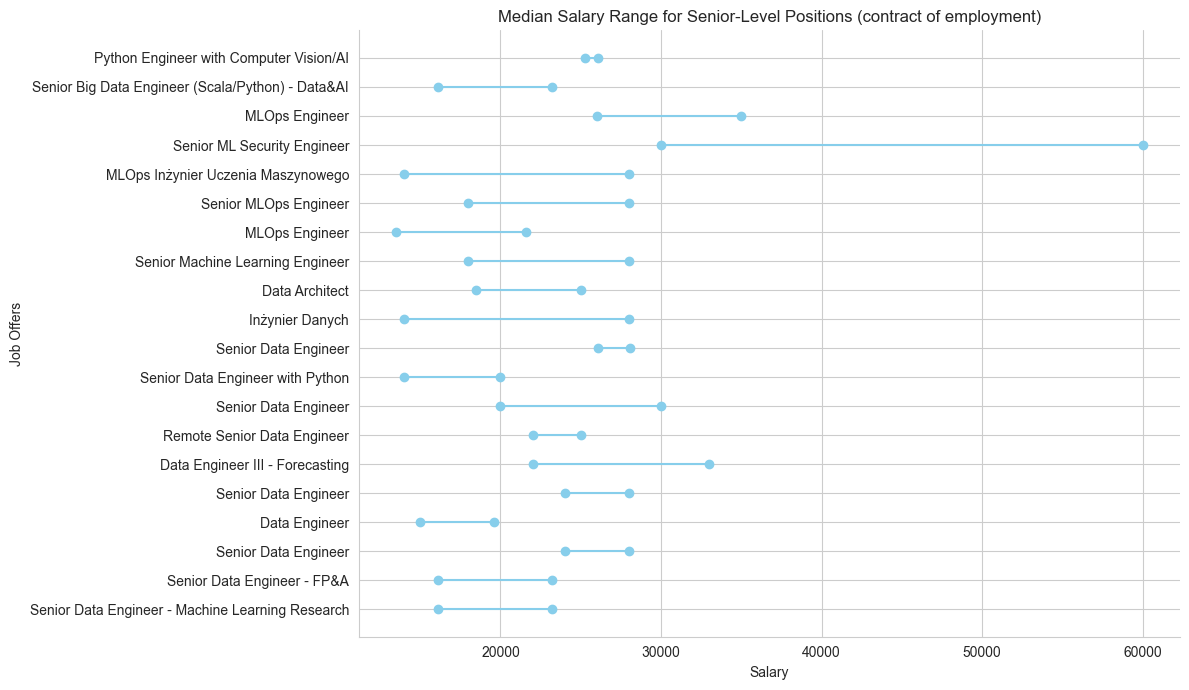

In [111]:
# Using Matplotlib for custom range plotting
plt.figure(figsize=(12, 7))

for i, row in df_filtered.iterrows():
    plt.plot([row['min_salary'], row['max_salary']], [i, i], marker='o', color='skyblue')

plt.yticks(range(len(df_filtered)), df_filtered['title'])
plt.xlabel('Salary')
plt.ylabel('Job Offers')

sns.despine()
plt.title('Median Salary Range for Senior-Level Positions (contract of employment)')

plt.tight_layout()
plt.savefig("plots/ranges_senior_uop.png")

plt.show()


/var/folders/5j/c9443ny96w1dn8fvj92_g8700000gn/T/ipykernel_16296/832007533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='median_salary', y=df_sorted.index, data=df_sorted, orient='h', palette='coolwarm')
/var/folders/5j/c9443ny96w1dn8fvj92_g8700000gn/T/ipykernel_16296/832007533.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(df_sorted['title'])


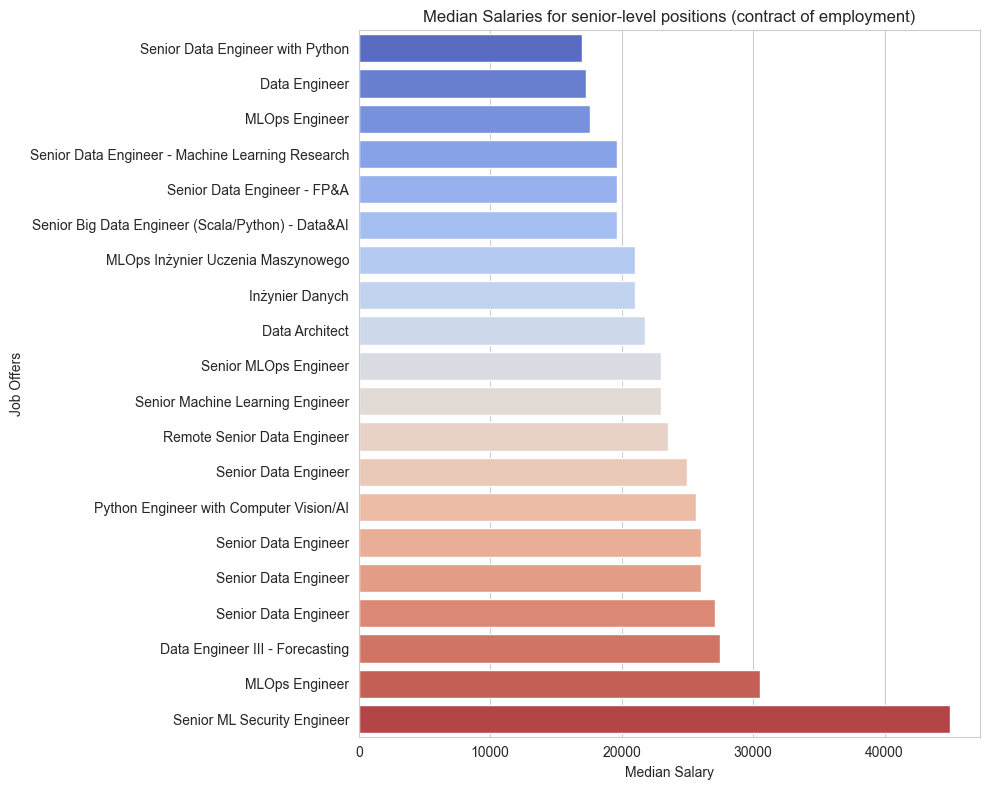

In [112]:
df_sorted = df_filtered.sort_values(by='median_salary', ascending=True).reset_index(drop=True)

plt.figure(figsize=(10, 8))

ax = sns.barplot(x='median_salary', y=df_sorted.index, data=df_sorted, orient='h', palette='coolwarm')

ax.set_yticklabels(df_sorted['title'])
ax.set_ylabel('Job Offers')
ax.set_xlabel('Median Salary')

plt.title('Median Salaries for senior-level positions (contract of employment)')

plt.tight_layout()
plt.savefig("plots/mediansalaries_senior_uop.png")

plt.show()

# B2B

In [113]:
DATA_PATHS: list = [
    "../data/transformed/data_nofluffjobs_data_engineer_b2b.json",
    "../data/transformed/data_nofluffjobs_machine_learning_engineer_b2b.json",
]

data = []
for path in DATA_PATHS:
    with open(path, "r") as f:
        data += json.load(f)["data"]

df = pd.DataFrame(data)

# Remove duplicates - based on title, company and seniority
df = df.drop_duplicates(subset=["title", "company", "seniority"])

# Add median salary column
df['median_salary'] = df[['min_salary', 'max_salary']].mean(axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 0 to 60
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            59 non-null     object 
 1   title          59 non-null     object 
 2   company        59 non-null     object 
 3   seniority      59 non-null     object 
 4   categories:    59 non-null     object 
 5   skills         59 non-null     object 
 6   min_salary     59 non-null     int64  
 7   max_salary     59 non-null     int64  
 8   median_salary  59 non-null     float64
dtypes: float64(1), int64(2), object(6)
memory usage: 4.6+ KB


## Mid

In [114]:
# Filter for mid only
df_filtered = df[df["seniority"] == "Mid"].reset_index(drop=True)

df_filtered.head()

,url,title,company,seniority,categories:,skills,min_salary,max_salary,median_salary
0,https://nofluffjobs.com/job/data-engineer-mid-...,Data Engineer (Mid / Regular),Sunscrapers,Mid,"[Data, Python]","[Python, SQL, PostgreSQL, Dagster, Data pipeli...",22000,25000,23500.0
1,https://nofluffjobs.com/job/financial-data-eng...,Financial Data Engineer,SoftKraft Sp z o.o.,Mid,"[Data, Python]","[Python, SQL, Git]",15960,25870,20915.0
2,https://nofluffjobs.com/job/data-engineer-know...,Data Engineer,Knowit,Mid,"[Data, SQL]","[SQL, Data warehouse, Power BI, Snowflake, Azure]",16800,23520,20160.0
3,https://nofluffjobs.com/job/data-engineer-seb-...,Data Engineer,SEB (Skandinaviska Enskilda Banken),Mid,"[Data, Spark]","[CI/CD, Spark, Container, GCP, Scala, Java, Py...",28000,33000,30500.0
4,https://nofluffjobs.com/job/data-engineer-suns...,Data Engineer,Sunscrapers,Mid,"[Data, Python]","[Python, Pandas, Sequel, dbt, ETL, Snowflake, ...",20000,24000,22000.0


/var/folders/5j/c9443ny96w1dn8fvj92_g8700000gn/T/ipykernel_16296/2395283562.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='median_salary', data=df_filtered, palette='Set2')


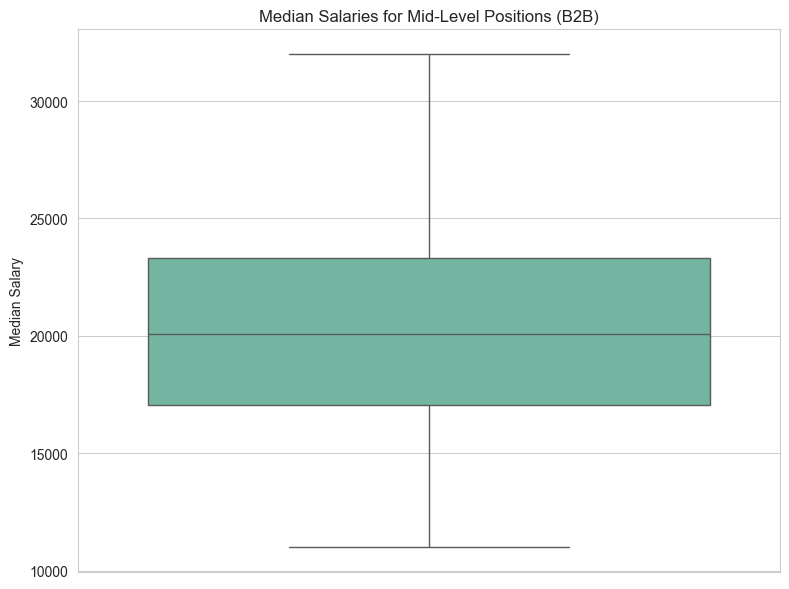

In [115]:
# Creating a boxplot of average salaries across different seniority levels
plt.figure(figsize=(8, 6))
sns.boxplot(y='median_salary', data=df_filtered, palette='Set2')
plt.ylabel('Median Salary')
plt.title('Median Salaries for Mid-Level Positions (B2B)')
plt.tight_layout()

# Save the plot to /plots/
Path("plots").mkdir(exist_ok=True)

plt.tight_layout()
plt.savefig("plots/boxplot_mid_b2b.png")

# Show the plot
plt.show()

In [116]:
df_stats = df_filtered.describe()
df_stats

,min_salary,max_salary,median_salary
count,22.000000,22.000000,22.000000
mean,17395.636364,24213.000000,20804.318182
std,5278.926285,6101.188885,5510.869358
min,8000.000000,14000.000000,11000.000000
25%,13958.000000,19994.000000,17055.000000
50%,15980.000000,24012.000000,20076.000000
75%,19620.000000,27510.000000,23295.000000
max,28000.000000,37000.000000,32000.000000


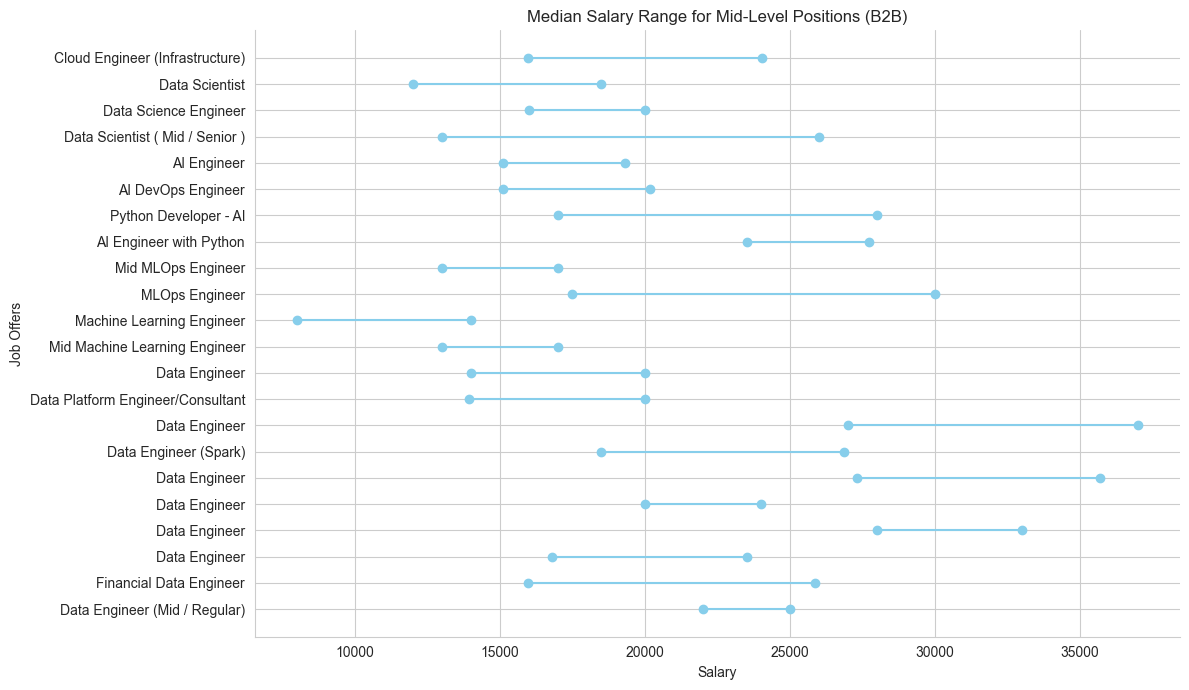

In [117]:
# Using Matplotlib for custom range plotting
plt.figure(figsize=(12, 7))

for i, row in df_filtered.iterrows():
    plt.plot([row['min_salary'], row['max_salary']], [i, i], marker='o', color='skyblue')

plt.yticks(range(len(df_filtered)), df_filtered['title'])
plt.xlabel('Salary')
plt.ylabel('Job Offers')

sns.despine()
plt.title('Median Salary Range for Mid-Level Positions (B2B)')

plt.tight_layout()
plt.savefig("plots/ranges_mid_b2b.png")

plt.show()


/var/folders/5j/c9443ny96w1dn8fvj92_g8700000gn/T/ipykernel_16296/1930028605.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='median_salary', y=df_sorted.index, data=df_sorted, orient='h', palette='coolwarm')
/var/folders/5j/c9443ny96w1dn8fvj92_g8700000gn/T/ipykernel_16296/1930028605.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(df_sorted['title'])


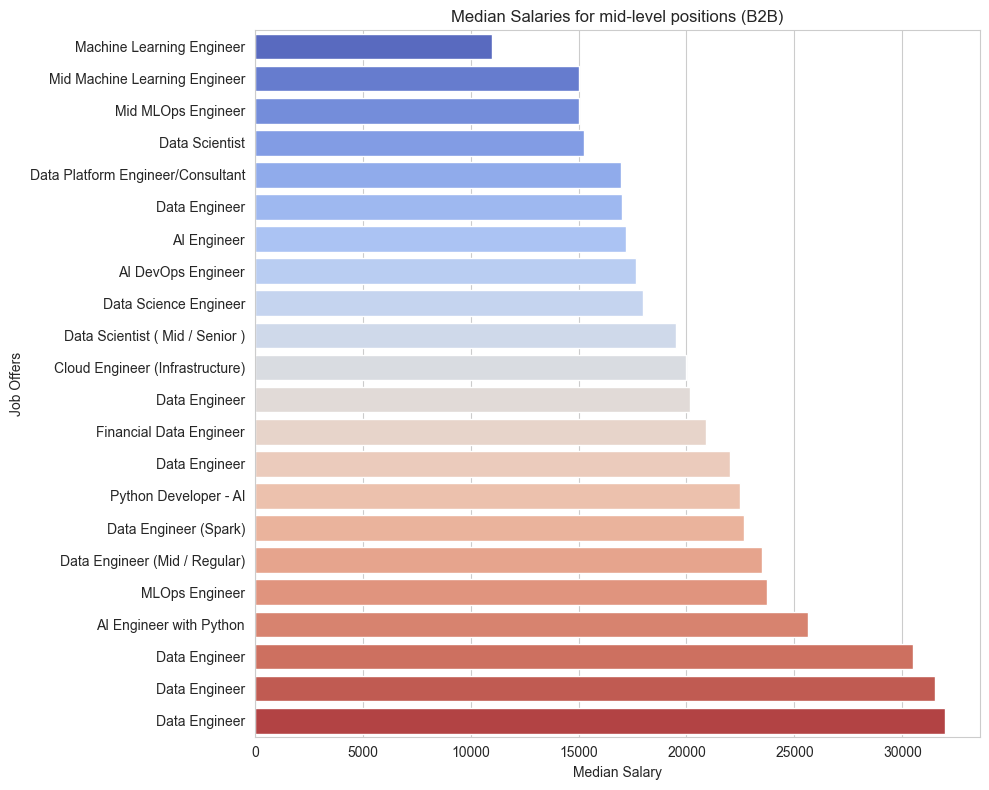

In [118]:
df_sorted = df_filtered.sort_values(by='median_salary', ascending=True).reset_index(drop=True)

plt.figure(figsize=(10, 8))

ax = sns.barplot(x='median_salary', y=df_sorted.index, data=df_sorted, orient='h', palette='coolwarm')

ax.set_yticklabels(df_sorted['title'])
ax.set_ylabel('Job Offers')
ax.set_xlabel('Median Salary')

plt.title('Median Salaries for mid-level positions (B2B)')

plt.tight_layout()
plt.savefig("plots/mediansalaries_mid_b2b.png")

plt.show()

## Senior

In [119]:
# Filter for senior only
df_filtered = df[df["seniority"] == "Senior"].reset_index(drop=True)

df_filtered.head()

,url,title,company,seniority,categories:,skills,min_salary,max_salary,median_salary
0,https://nofluffjobs.com/job/senior-data-engine...,Senior Data Engineer (AWS),GetInData | Part of Xebia,Senior,"[Data, AWS]","[Python, SQL, Redshift, AWS, Airflow, Docker, ...",26880,33600,30240.0
1,https://nofluffjobs.com/job/senior-data-engine...,Senior Data Engineer (GCP),GetInData | Part of Xebia,Senior,"[Data, GCP]","[Python, SQL, BigQuery, Spark, GCP, Airflow, K...",26880,33600,30240.0
2,https://nofluffjobs.com/job/senior-data-engine...,Senior Data Engineer (Azure),GetInData | Part of Xebia,Senior,[Data],"[Python, SQL, Databricks, Kafka, Git, Airflow,...",26880,33600,30240.0
3,https://nofluffjobs.com/job/data-engineer-prox...,Data Engineer,Proxet,Senior,[Data],"[Data engineering, Data warehouse, ETL, Relati...",20048,34081,27064.5
4,https://nofluffjobs.com/job/data-engineer-soll...,Data Engineer,Sollers Consulting,Senior,"[Data, Kafka]","[Spark, Kafka, SQL, NoSQL, ETL, Python, Java, ...",17200,21000,19100.0


/var/folders/5j/c9443ny96w1dn8fvj92_g8700000gn/T/ipykernel_16296/3527987780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='median_salary', data=df_filtered, palette='Set2')


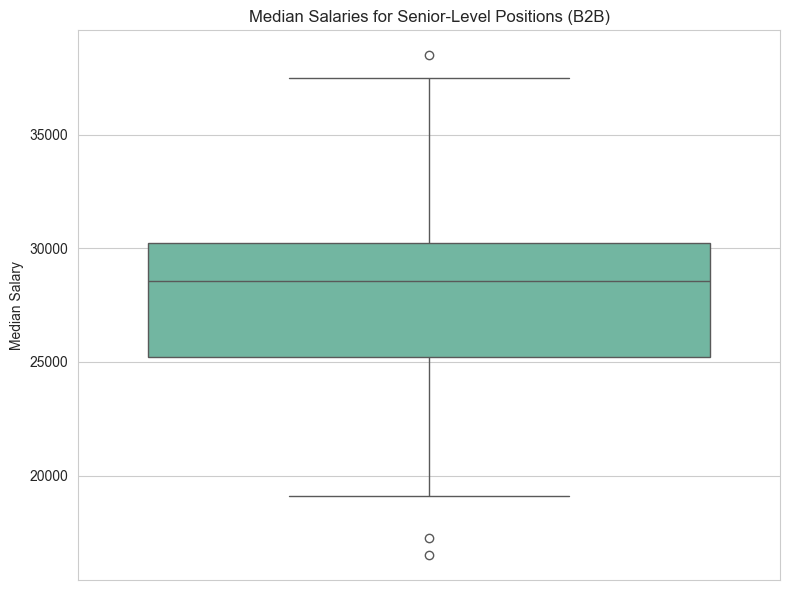

In [120]:
# Creating a boxplot of average salaries across different seniority levels
plt.figure(figsize=(8, 6))
sns.boxplot(y='median_salary', data=df_filtered, palette='Set2')
plt.ylabel('Median Salary')
plt.title('Median Salaries for Senior-Level Positions (B2B)')
plt.tight_layout()

# Save the plot to /plots/
Path("plots").mkdir(exist_ok=True)

plt.tight_layout()
plt.savefig("plots/boxplot_senior_b2b.png")

# Show the plot
plt.show()

In [121]:
df_stats = df_filtered.describe()
df_stats

,min_salary,max_salary,median_salary
count,37.000000,37.000000,37.000000
mean,24100.729730,31467.162162,27783.945946
std,4387.738336,5668.238677,4731.723781
min,12950.000000,18500.000000,16500.000000
25%,21000.000000,28067.000000,25200.000000
50%,25200.000000,30240.000000,28560.000000
75%,26880.000000,33600.000000,30240.000000
max,33000.000000,47000.000000,38500.000000


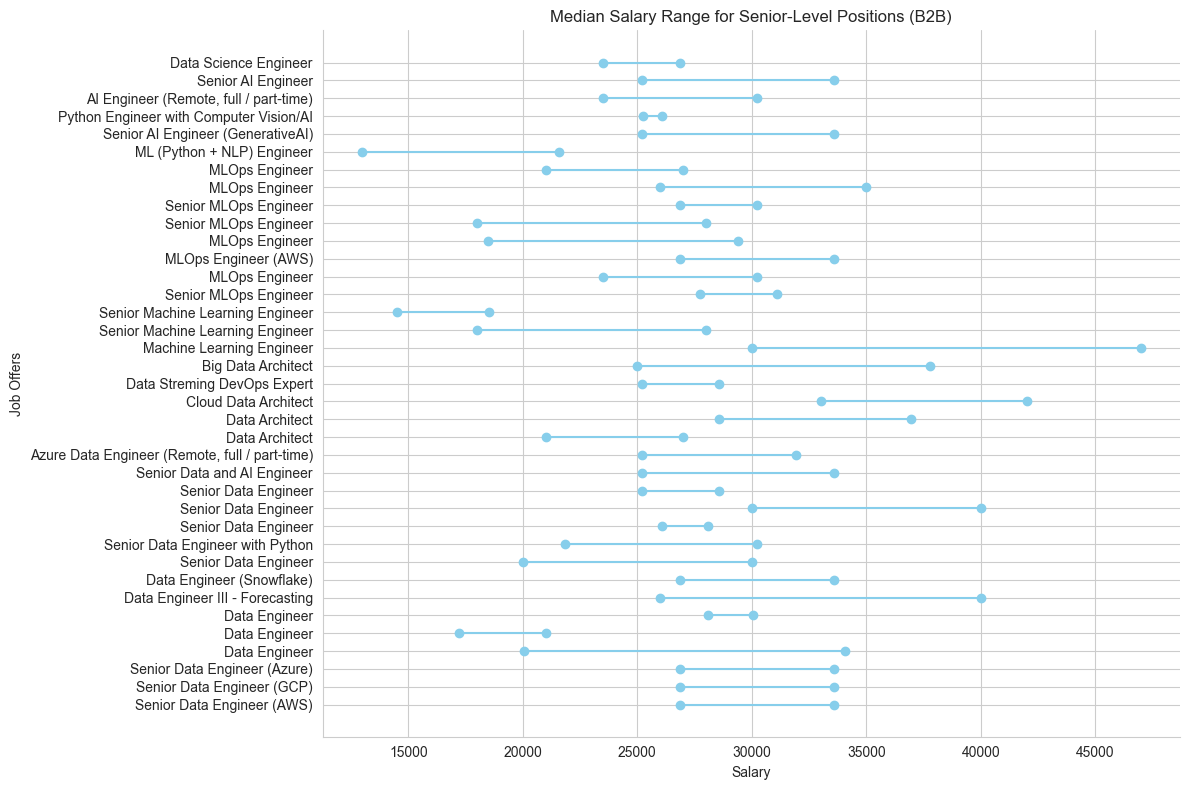

In [122]:
# Using Matplotlib for custom range plotting
plt.figure(figsize=(12, 8))

for i, row in df_filtered.iterrows():
    plt.plot([row['min_salary'], row['max_salary']], [i, i], marker='o', color='skyblue')

plt.yticks(range(len(df_filtered)), df_filtered['title'])
plt.xlabel('Salary')
plt.ylabel('Job Offers')

sns.despine()
plt.title('Median Salary Range for Senior-Level Positions (B2B)')

plt.tight_layout()
plt.savefig("plots/ranges_senior_b2b.png")

plt.show()


/var/folders/5j/c9443ny96w1dn8fvj92_g8700000gn/T/ipykernel_16296/2754453454.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='median_salary', y=df_sorted.index, data=df_sorted, orient='h', palette='coolwarm')
/var/folders/5j/c9443ny96w1dn8fvj92_g8700000gn/T/ipykernel_16296/2754453454.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(df_sorted['title'])


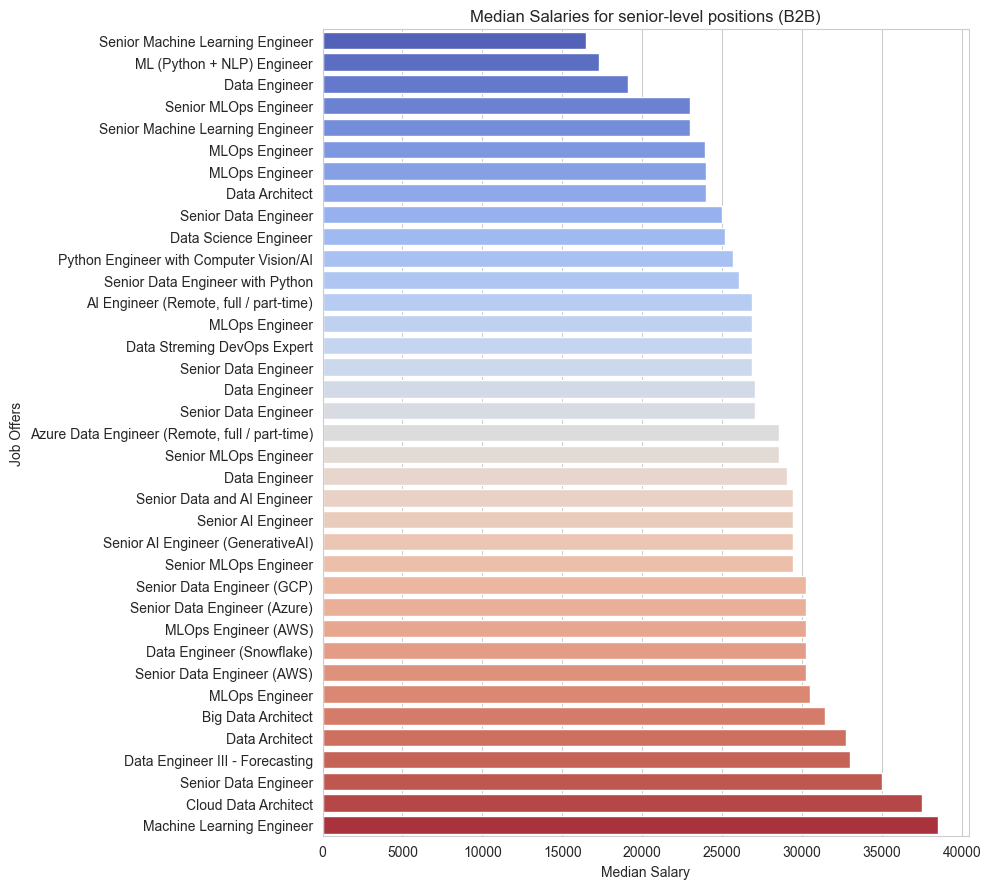

In [123]:
df_sorted = df_filtered.sort_values(by='median_salary', ascending=True).reset_index(drop=True)

plt.figure(figsize=(10, 9))

ax = sns.barplot(x='median_salary', y=df_sorted.index, data=df_sorted, orient='h', palette='coolwarm')

ax.set_yticklabels(df_sorted['title'])
ax.set_ylabel('Job Offers')
ax.set_xlabel('Median Salary')

plt.title('Median Salaries for senior-level positions (B2B)')

plt.tight_layout()
plt.savefig("plots/mediansalaries_senior_b2b.png")

plt.show()